### 911 Calls Project 

911 Calls Data: [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat:  Latitude
* lng: Longitude
* desc: Description of the Emergency Call
* zip: Zipcode
* title: Title (Reason + title code)
* timeStamp: YYYY-MM-DD HH:MM:SS
* twp: Township
* addr: Address
* e: Dummy variable (always 1)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
print(df.shape)
df.head()

(99492, 9)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [4]:
# while df['e'] column doesnt mean anything as it's same for all values, there is no further need it.
df = df.drop('e', axis=1) 
# For sake of simplification, I'm going to drop nan values,so while there is enough data, dropping those ones doesn't have 
# significant effect 
df.dropna(inplace=True)  
print(df.shape)
df.head()

(86576, 8)


,lat,lng,desc,zip,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        86576 non-null  float64
 1   lng        86576 non-null  float64
 2   desc       86576 non-null  object 
 3   zip        86576 non-null  float64
 4   title      86576 non-null  object 
 5   timeStamp  86576 non-null  object 
 6   twp        86576 non-null  object 
 7   addr       86576 non-null  object 
dtypes: float64(3), object(5)
memory usage: 5.9+ MB


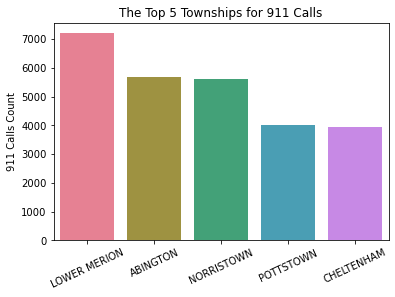

In [6]:
fg = sns.countplot(data =df, x='twp', order=df['twp'].value_counts().index[:5], palette='husl')

fg.set(xlabel=None, ylabel='911 Calls Count', title = 'The Top 5 Townships for 911 Calls')

plt.xticks(rotation=25)
plt.show()

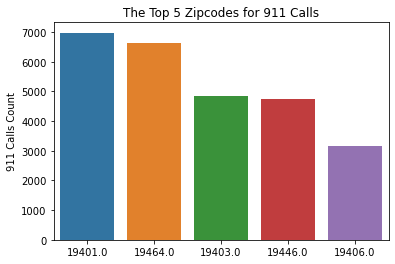

In [7]:
fg = sns.countplot(data =df, x='zip', order=df['zip'].value_counts().index[:5])

fg.set(xlabel=None, ylabel='911 Calls Count', title = 'The Top 5 Zipcodes for 911 Calls')

plt.show()

In [8]:
df['title'].unique()[:10]

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: DIZZINESS'], dtype=object)

In [9]:
df['title'].nunique()

107

In [10]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

**The most common Reason for a 911 call**

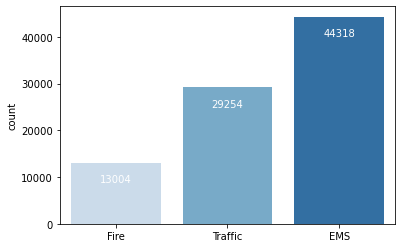

In [11]:
ax = sns.countplot(x=df['Reason'], data=df, order=df['Reason'].value_counts().index[::-1], palette='Blues')

ax.set(xlabel=None)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=10)


In [12]:
type(df['timeStamp'].iloc[4])

str

In [13]:
# Data type should be converted to datetime to work with dates easily.
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [14]:
time = df['timeStamp'].iloc[0]

time, time.year, time.month, time.day, time.hour

(Timestamp('2015-12-10 17:40:00'), 2015, 12, 10, 17)

In [15]:
df['Year'] = df['timeStamp'].apply(lambda time: time.year)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [16]:
dow_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [17]:
df['Day of Week'] = df['Day of Week'].map(dow_map)

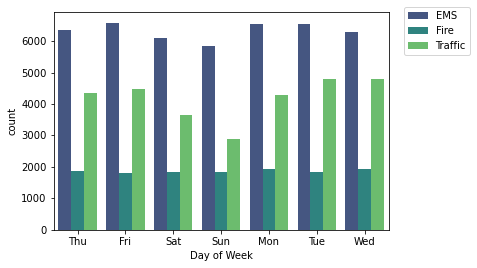

In [18]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.03, 0.78), loc=3)

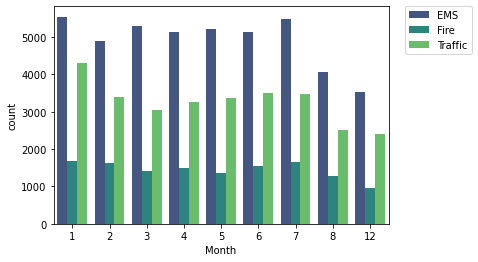

In [19]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**The graphs above doesnt sense from the first sight, the better way to visualization time data type is "line chart". On the other hand, It is missing some months! 9,10, and 11 are not there. So, by line chart we can fill in this info**

In [20]:
byDoW = df.groupby('Day of Week').count()
byDoW

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Year,Hour,Month
Day of Week,,,,,,,,,,,,
Fri,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880,12880
Mon,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757
Sat,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599,11599
Sun,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550,10550
Thu,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575,12575
Tue,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197,13197
Wed,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018,13018


<AxesSubplot:xlabel='Day of Week'>

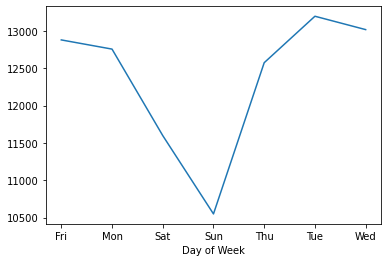

In [21]:
byDoW['title'].plot()

In [22]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Year,Hour,Day of Week
Month,,,,,,,,,,,,
1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939


<AxesSubplot:xlabel='Month'>

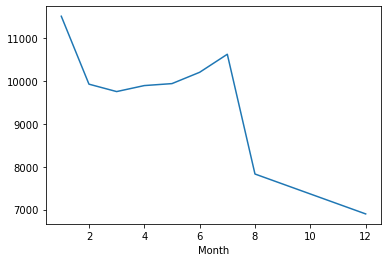

In [23]:
byMonth['twp'].plot()

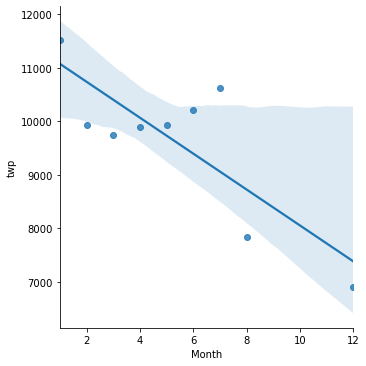

In [24]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [25]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

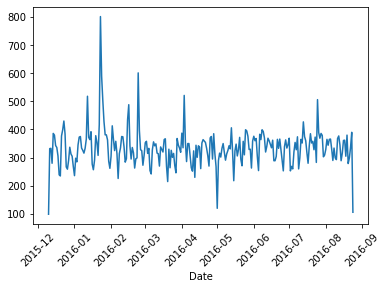

In [26]:
df.groupby('Date').count()['twp'].plot()
plt.xticks(rotation=45)
plt.show()

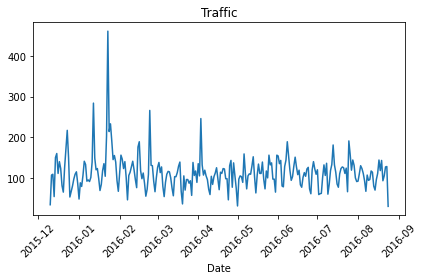

In [27]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.xticks(rotation=45)
plt.tight_layout()

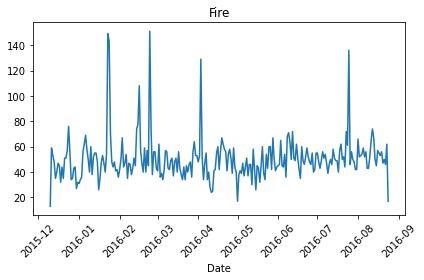

In [28]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.xticks(rotation=45)
plt.tight_layout()

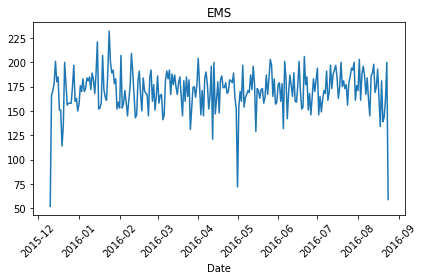

In [29]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.xticks(rotation=45)
plt.tight_layout()

**Making a heatmap might give us more insight**

In [30]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,248,200,165,164,184,166,319,525,636,663,...,806,839,897,825,714,616,569,491,445,400
Mon,243,198,183,173,185,222,338,547,723,689,...,759,776,837,845,762,654,547,443,410,294
Sat,324,265,226,212,202,205,227,352,416,566,...,674,677,705,649,678,613,549,508,450,402
Sun,335,280,245,228,199,214,251,342,434,554,...,608,588,555,608,574,559,464,419,365,283
Thu,251,180,200,144,162,167,293,495,685,733,...,758,827,790,867,706,610,543,472,356,307
Tue,241,214,161,148,184,203,350,563,719,763,...,821,823,867,896,759,665,578,494,411,245
Wed,225,193,169,193,138,224,332,591,769,714,...,787,760,860,878,771,590,596,507,432,294


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

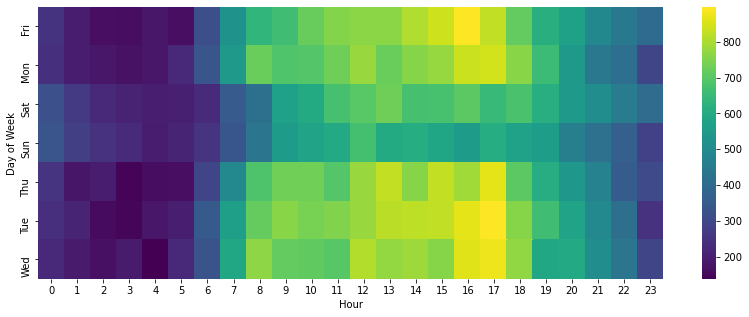

In [31]:
plt.figure(figsize=(14,5))
sns.heatmap(dayHour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

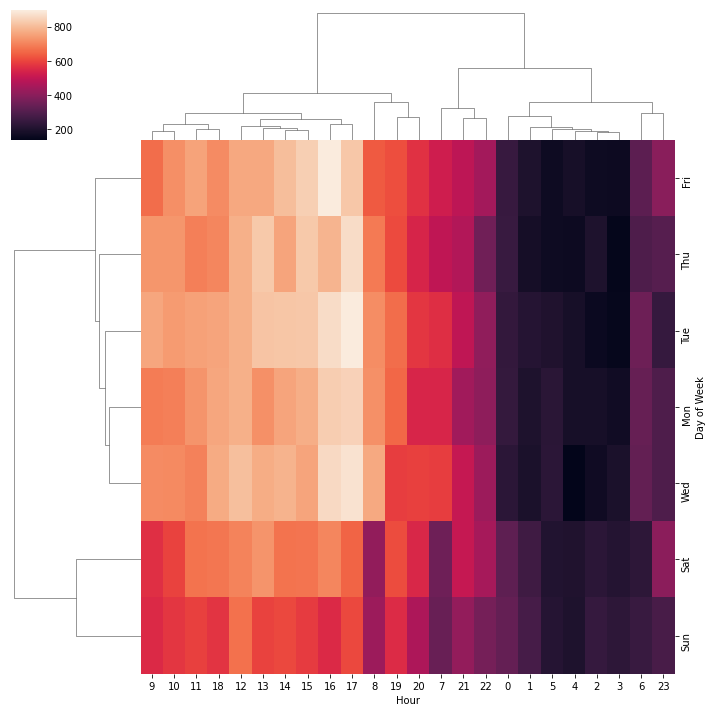

In [32]:
sns.clustermap(dayHour,cmap='rocket')

In [33]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1735,1360,1331,1683,1504,1429,1810,1123,905
Mon,1505,1658,1364,1401,1547,1395,1472,1315,1100
Sat,1979,1240,1110,1512,1264,1201,1507,955,831
Sun,1726,1058,973,1304,1230,1136,1440,878,805
Thu,1387,1391,1648,1390,1387,1800,1447,1038,1087
Tue,1697,1535,1647,1255,1658,1452,1446,1415,1092
Wed,1482,1684,1680,1348,1349,1790,1502,1105,1078


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

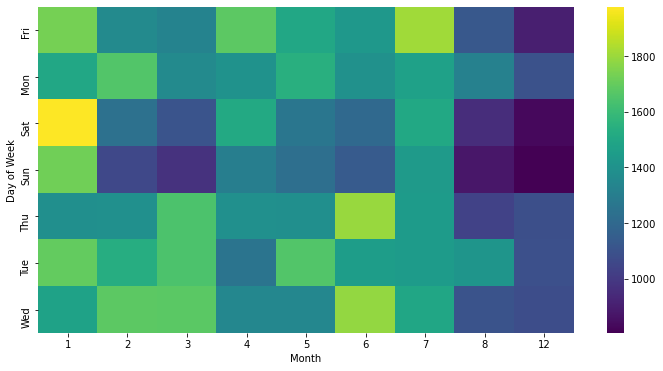

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

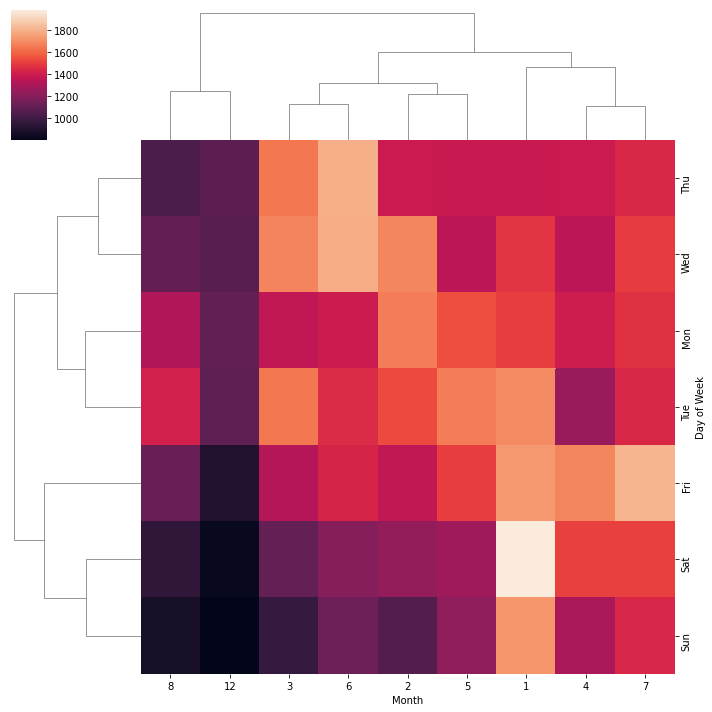

In [35]:
sns.clustermap(dayMonth,cmap='rocket')

In [36]:
df['twp'].value_counts().head()

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4029
CHELTENHAM      3942
Name: twp, dtype: int64

                                                Conclusion!

The main Reason of 911 calls is: 
                            EMS -> Traffic -> Fire

Most of these calls are coming from:
                            LOWER MERION -> ABINGTON -> NORRISTOWN -> POTTSTOWN -> CHELTENHAM

Most of these calls are recorded on Saturdays in January

While there is no considerably massive calls from Midnight till 6:00 am, intensive calls are recorded at 10:00 am - 5:00 pm, especially 4:00 - 5:00 pm are excessive calls period

In total, large amount of calls seems on Tuesday and Wednesday.


In [51]:
df[df['Reason'] == 'EMS']['twp'].value_counts()

NORRISTOWN          3680
ABINGTON            2878
LOWER MERION        2830
POTTSTOWN           2605
LOWER PROVIDENCE    1952
                    ... 
BRYN ATHYN            67
DELAWARE COUNTY       58
GREEN LANE            21
LEHIGH COUNTY         17
PHILA COUNTY           2
Name: twp, Length: 67, dtype: int64

As it seems above, even though most of calls came from 'Lower Merion' Region, EMS calls had been recorded by 'Norristown' region.So, it is always a good idea to focus on  specific regional data for precaution. I mean, maybe you can make road instructions in 'X' region, but can improve current health policy by constructing public amenities, as instance, in 'Y' region